In [1]:
import pickle
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors




In [14]:
with open("best_reward13.66_iteration_0001.p","rb") as f:
    og_gdf = pickle.load(f)

og_gdf.keys()

dict_keys(['actor_critic_dict', 'loss_iter', 'best_rewards', 'best_plans', 'current_rewards', 'current_plans', 'iteration'])

In [15]:
og_gdf['current_plans']

[{'road_network': -1.0,
  'life_circle': 1.5723415323280614,
  'greenness': 0.740873607232605,
  'wastemgmt': 0.34017795400234907,
  'drainage': 0,
  'concept': -1.0,
  'life_circle_info': {'life_circle_15min': 0.8000000000000002,
   'life_circle_10min': 0.5944444444444444,
   'life_circle_5min': 0.31666666666666665,
   'life_circle_10min_area': 0.5712561471029742,
   'decentralization_reward': 0.24538162269532557,
   'utility': 0.23024856247031422,
   'even_population_distribution_reward': 0.41750062930236775,
   'traffic_reward': 0.6525025347720748,
   'shopping': 0.9666666666666667,
   'wastemgmt': 0.3333333333333333,
   'education': 0.5,
   'medical care': 0.7333333333333333,
   'entertainment': 0.2,
   'working': 0.8333333333333334},
  'concept_info': {},
  'land_use_reward': 13.659783819859445,
  'gdf':                                               geometry  type  existence  \
  0    POLYGON ((957 470, 1047 459, 1075 655, 865 658...     4       True   
  1         POLYGON ((750 8

In [29]:
gdf = og_gdf['best_plans'][0]['gdf']
gdf['population'] = gdf['population'].astype(float)

In [30]:
gdf[(gdf['population'].notna()) & (gdf['geometry'].geom_type=="Point")]

,geometry,type,existence,population,rect,eqi,sc
232,POINT (0 705),15,True,427.0,NaN,NaN,NaN
233,POINT (103 515),15,True,161.0,NaN,NaN,NaN
234,POINT (134 274),15,True,295.0,NaN,NaN,NaN
235,POINT (187 546),15,True,884.0,NaN,NaN,NaN
236,POINT (190 291),15,True,319.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...
465,POINT (798.779 314.286),15,True,100.0,NaN,NaN,NaN
470,POINT (819.799 441.043),15,True,100.0,NaN,NaN,NaN
478,POINT (1319.5 704.417),15,True,100.0,NaN,NaN,NaN
484,POINT (799.561 319.003),15,True,100.0,NaN,NaN,NaN


/tmp/ipykernel_3319/2873579445.py:62: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  subset.plot(ax=ax, color=color, label=legend_labels[type_value], zorder=2)


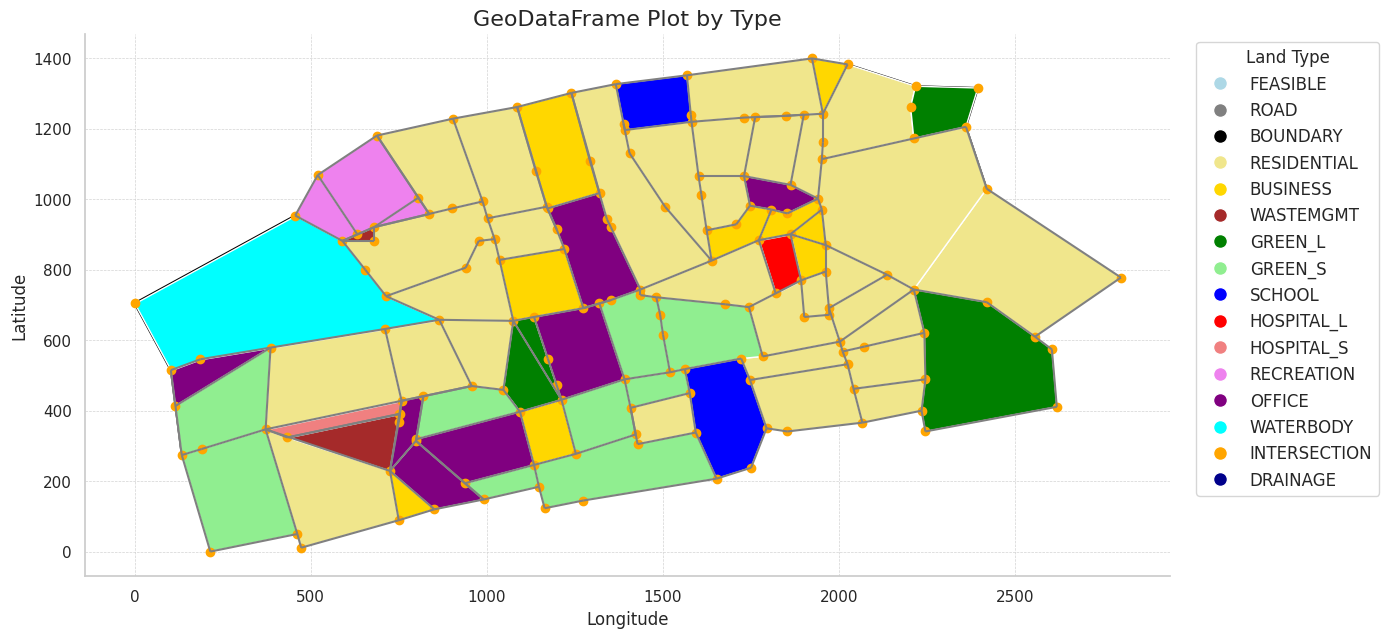

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define color map for each type
type_colors = {
    1: "lightblue",       # FEASIBLE
    2: "gray",            # ROAD
    3: "black",           # BOUNDARY
    4: "khaki",           # RESIDENTIAL
    5: "gold",            # BUSINESS
    6: "brown",           # WASTEMGMT
    7: "green",           # GREEN_L
    8: "lightgreen",      # GREEN_S
    9: "blue",            # SCHOOL
    10: "red",            # HOSPITAL_L
    11: "lightcoral",     # HOSPITAL_S
    12: "violet",         # RECREATION
    13: "purple",         # OFFICE
    14: "aqua",           # WATERBODY
    15: "orange",         # INTERSECTION
    16: "darkblue"        # DRAINAGE
}

# Legend labels
legend_labels = {
    1: "FEASIBLE",
    2: "ROAD",
    3: "BOUNDARY",
    4: "RESIDENTIAL",
    5: "BUSINESS",
    6: "WASTEMGMT",
    7: "GREEN_L",
    8: "GREEN_S",
    9: "SCHOOL",
    10: "HOSPITAL_L",
    11: "HOSPITAL_S",
    12: "RECREATION",
    13: "OFFICE",
    14: "WATERBODY",
    15: "INTERSECTION",
    16: "DRAINAGE"
}

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plot each type with distinct color and layer points on top with larger markersize
for type_value, color in type_colors.items():
    subset = gdf[gdf['type'] == type_value]
    
    # Roads are plotted last and with a higher z-order to ensure visibility
    if type_value == 2:
        subset.plot(ax=ax, color=color, linewidth=1.5, label=legend_labels[type_value], zorder=4)
    # elif subset.geometry.iloc[0].geom_type == 'Point':
    #     subset.plot(ax=ax, color=color, markersize=50, label=legend_labels[type_value], zorder=3)
    else:
        subset.plot(ax=ax, color=color, label=legend_labels[type_value], zorder=2)

# Set custom legend with all labels included
legend_handles = []
for type_value, label in legend_labels.items():
    handle = plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=type_colors[type_value])
    legend_handles.append(handle)

ax.legend(handles=legend_handles, title="Land Type", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')

# Additional styling
plt.title("GeoDataFrame Plot by Type", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

plt.show()


/tmp/ipykernel_3319/1739933075.py:41: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  subset.plot(ax=ax, color=color, label=legend_labels[type_value], zorder=2)


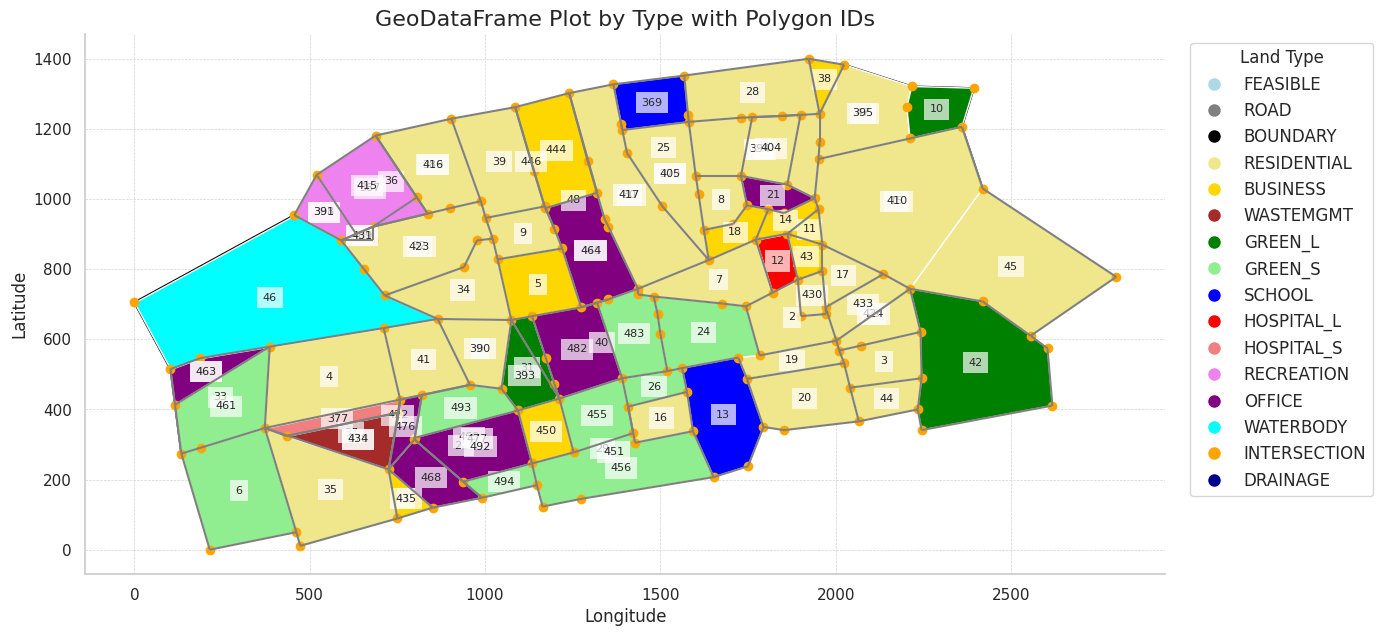

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

def add_polygon_labels(gdf, ax):
    """
    Add polygon IDs at the centroid of each polygon
    
    Parameters:
    - gdf: GeoDataFrame with polygons
    - ax: Matplotlib axis to add labels to
    """
    for idx, row in gdf.iterrows():
        # Skip non-polygon geometries
        if row.geometry.geom_type in ['Polygon', 'MultiPolygon']:
            # Get centroid coordinates
            centroid = row.geometry.centroid
            
            # Add text label with polygon ID
            ax.text(
                centroid.x, 
                centroid.y, 
                str(idx),  # Use index as ID
                fontsize=8, 
                ha='center', 
                va='center',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
            )

# Use the existing plotting code, but add the labeling function
fig, ax = plt.subplots(figsize=(14, 12))

# Plot each type with distinct color
for type_value, color in type_colors.items():
    subset = gdf[gdf['type'] == type_value]
    
    # Roads are plotted last and with a higher z-order to ensure visibility
    if type_value == 2:
        subset.plot(ax=ax, color=color, linewidth=1.5, label=legend_labels[type_value], zorder=4)
    else:
        subset.plot(ax=ax, color=color, label=legend_labels[type_value], zorder=2)

# Add polygon ID labels
add_polygon_labels(gdf, ax)

# Set custom legend with all labels included
legend_handles = []
for type_value, label in legend_labels.items():
    handle = plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=type_colors[type_value])
    legend_handles.append(handle)
ax.legend(handles=legend_handles, title="Land Type", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')

# Additional styling
plt.title("GeoDataFrame Plot by Type with Polygon IDs", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3319/3615257919.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(title="Types", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')
/tmp/ipykernel_3319/3615257919.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Types", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')


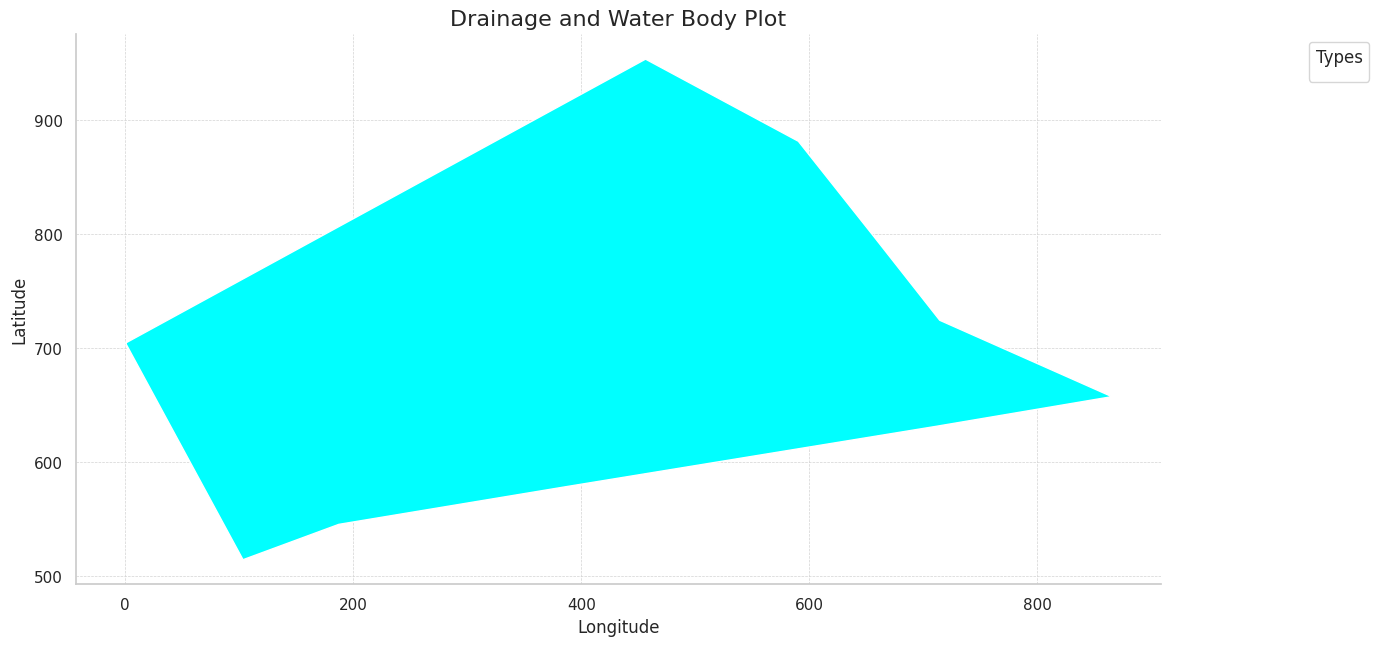

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define color map for drainage and water bodies
drainage_color = "darkblue"  # Color for drainage
waterbody_color = "aqua"      # Color for water bodies

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plot drainage lines
drainage_lines = gdf[gdf['type'] == 16]
if not drainage_lines.empty:
    drainage_lines.plot(ax=ax, color=drainage_color, linewidth=2, label="DRAINAGE", zorder=2)

# Plot water bodies
water_bodies = gdf[gdf['type'] == 14]
if not water_bodies.empty:
    water_bodies.plot(ax=ax, color=waterbody_color, label="WATERBODY", zorder=1)

# Set custom legend
ax.legend(title="Types", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')

# Additional styling
plt.title("Drainage and Water Body Plot", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

plt.show()


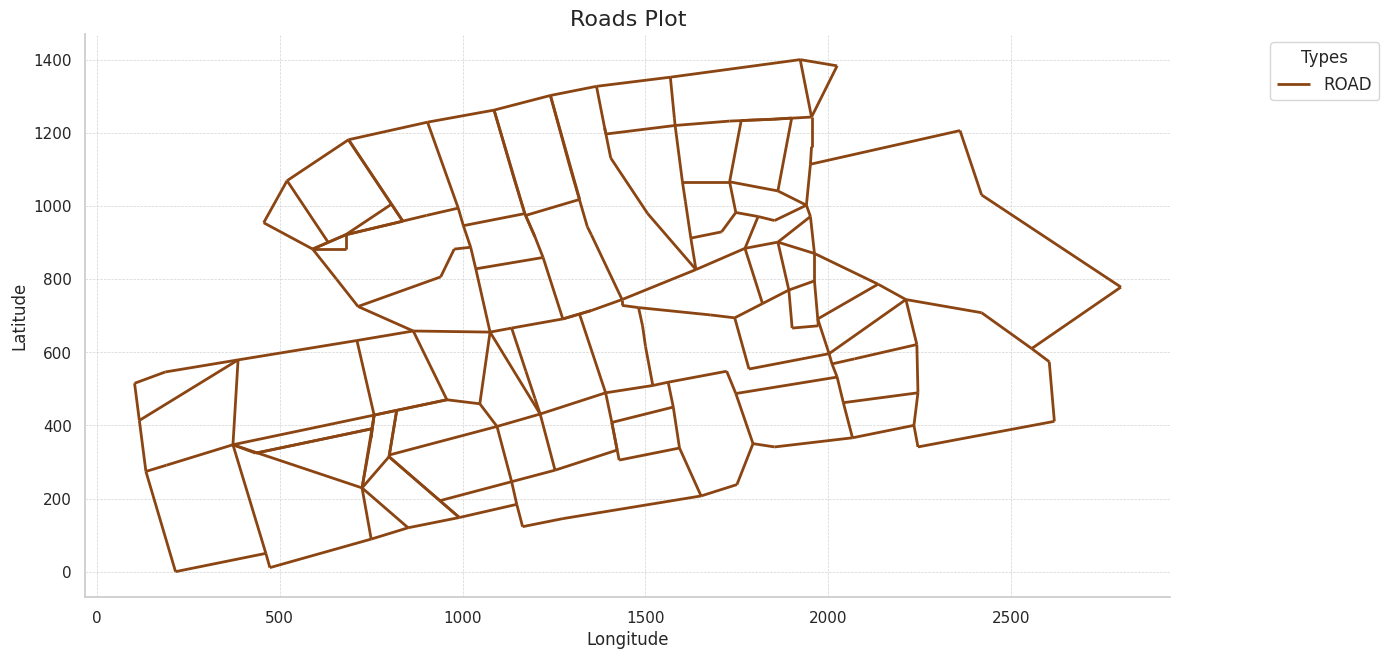

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define color for roads
road_color = "saddlebrown"  # Color for roads

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plot all roads
roads = gdf[gdf['type'] == 2]  # Assuming '2' corresponds to ROAD type
if not roads.empty:
    roads.plot(ax=ax, color=road_color, linewidth=2, label="ROAD", zorder=2)

# Set custom legend
ax.legend(title="Types", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')

# Additional styling
plt.title("Roads Plot", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

plt.show()


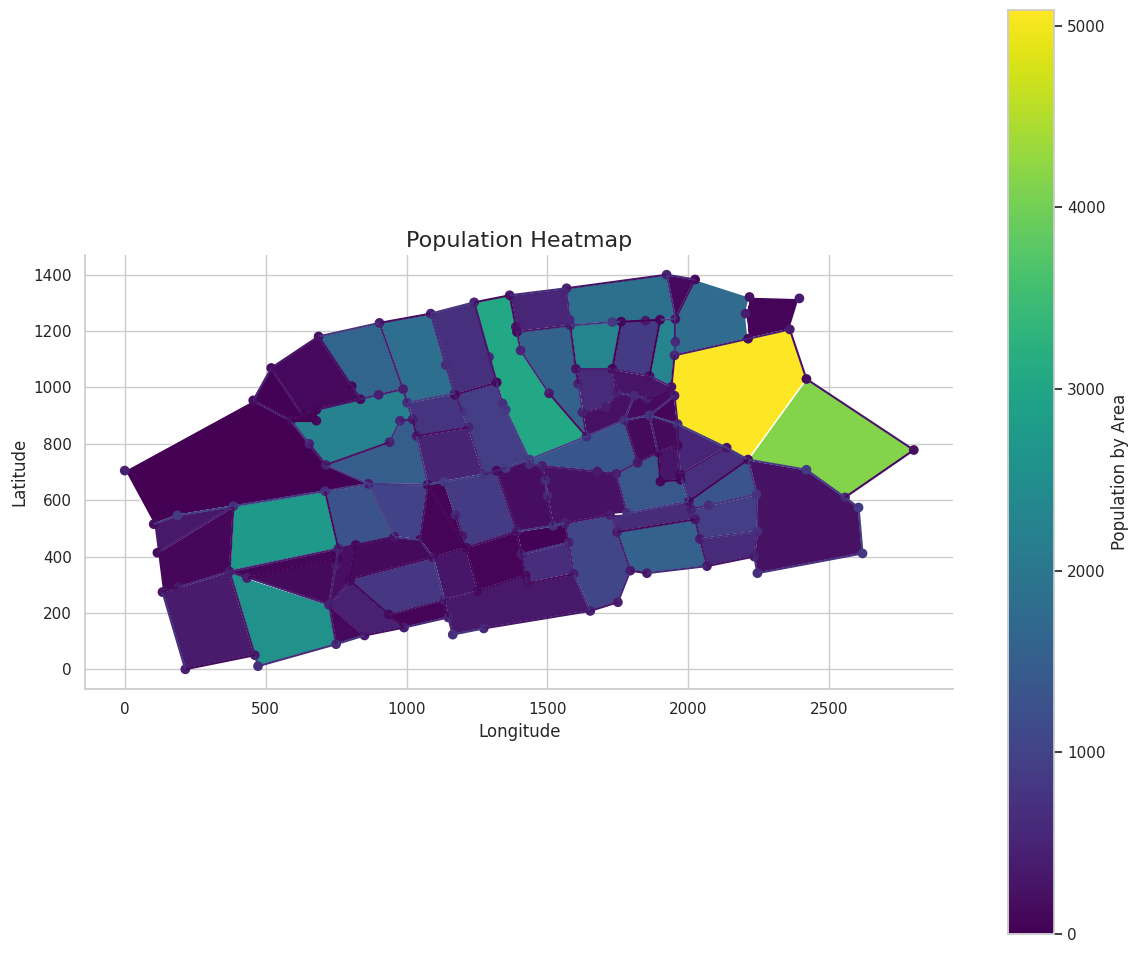

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot the geometries, coloring them by population
gdf.plot(column='population', ax=ax, cmap='viridis', legend=True,
         legend_kwds={'label': "Population by Area", 'orientation': "vertical"})

# Add titles and labels
plt.title("Population Heatmap", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look

# Show the plot
plt.show()


In [37]:
gdf[gdf['geometry'].geom_type=="LineString"]

,geometry,type,existence,population,rect,eqi,sc
49,"LINESTRING (1436 744, 1352 921)",2,True,941.000000,NaN,NaN,NaN
50,"LINESTRING (1352 921, 1341 943)",2,True,730.000000,NaN,NaN,NaN
51,"LINESTRING (1341 943, 1293 1108)",2,True,661.000000,NaN,NaN,NaN
52,"LINESTRING (1293 1108, 1240 1302)",2,True,591.000000,NaN,NaN,NaN
53,"LINESTRING (2041 462, 2245 489)",2,True,702.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
486,"LINESTRING (798.779 314.286, 799.561 319.003)",2,True,50.000000,NaN,NaN,NaN
488,"LINESTRING (798.779 314.286, 937.796 194.025)",2,True,120.125000,NaN,NaN,NaN
489,"LINESTRING (991 148, 937.796 194.025)",2,True,120.125000,NaN,NaN,NaN
490,"LINESTRING (799.561 319.003, 1094 397)",2,True,145.333333,NaN,NaN,NaN


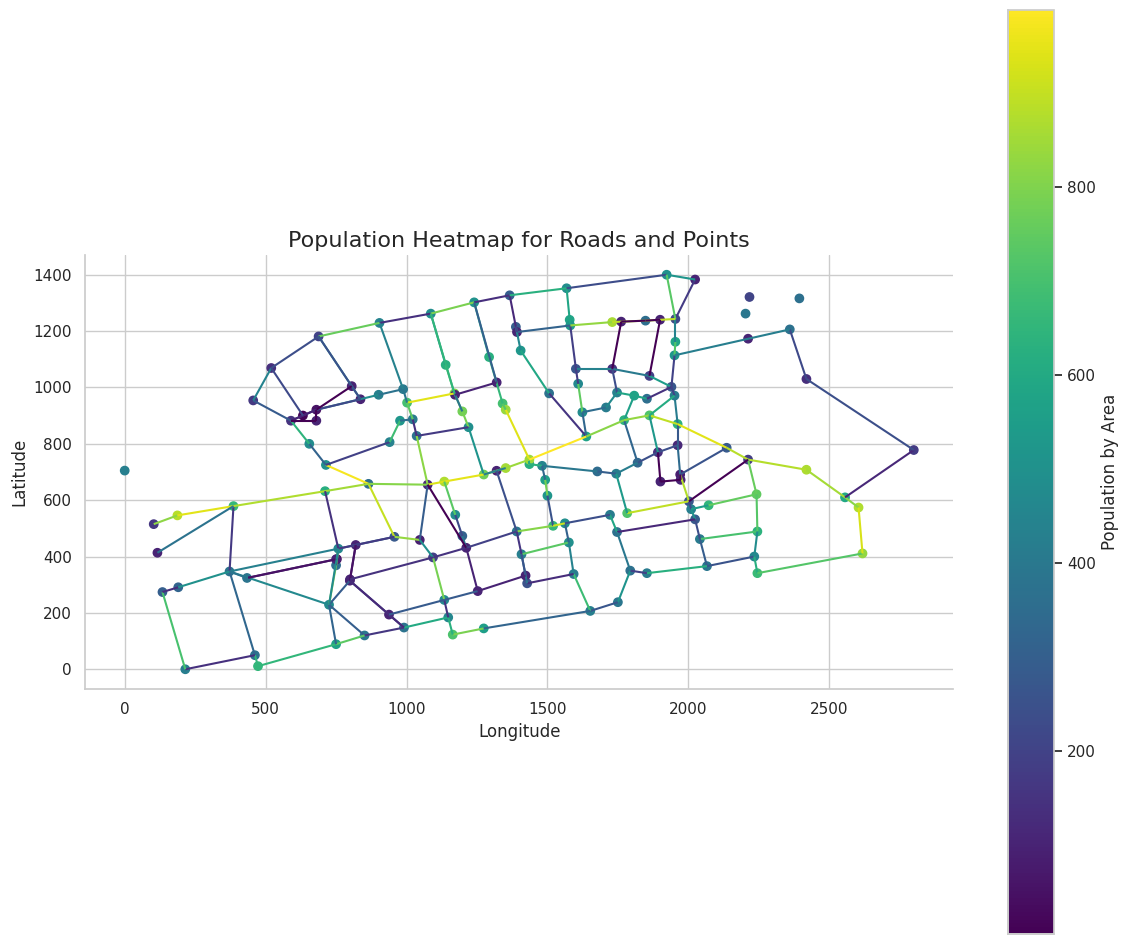

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Filter the GeoDataFrame for roads and points
roads_and_points_gdf = gdf[gdf['geometry'].geom_type.isin(['Point', 'LineString'])]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot the geometries, coloring them by population
# Note: Points will be plotted as dots and roads as lines, but the color will represent population
roads_and_points_gdf.plot(column='population', ax=ax, cmap='viridis', legend=True,
                          legend_kwds={'label': "Population by Area", 'orientation': "vertical"})

# Add titles and labels
plt.title("Population Heatmap for Roads and Points", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look

# Show the plot
plt.show()


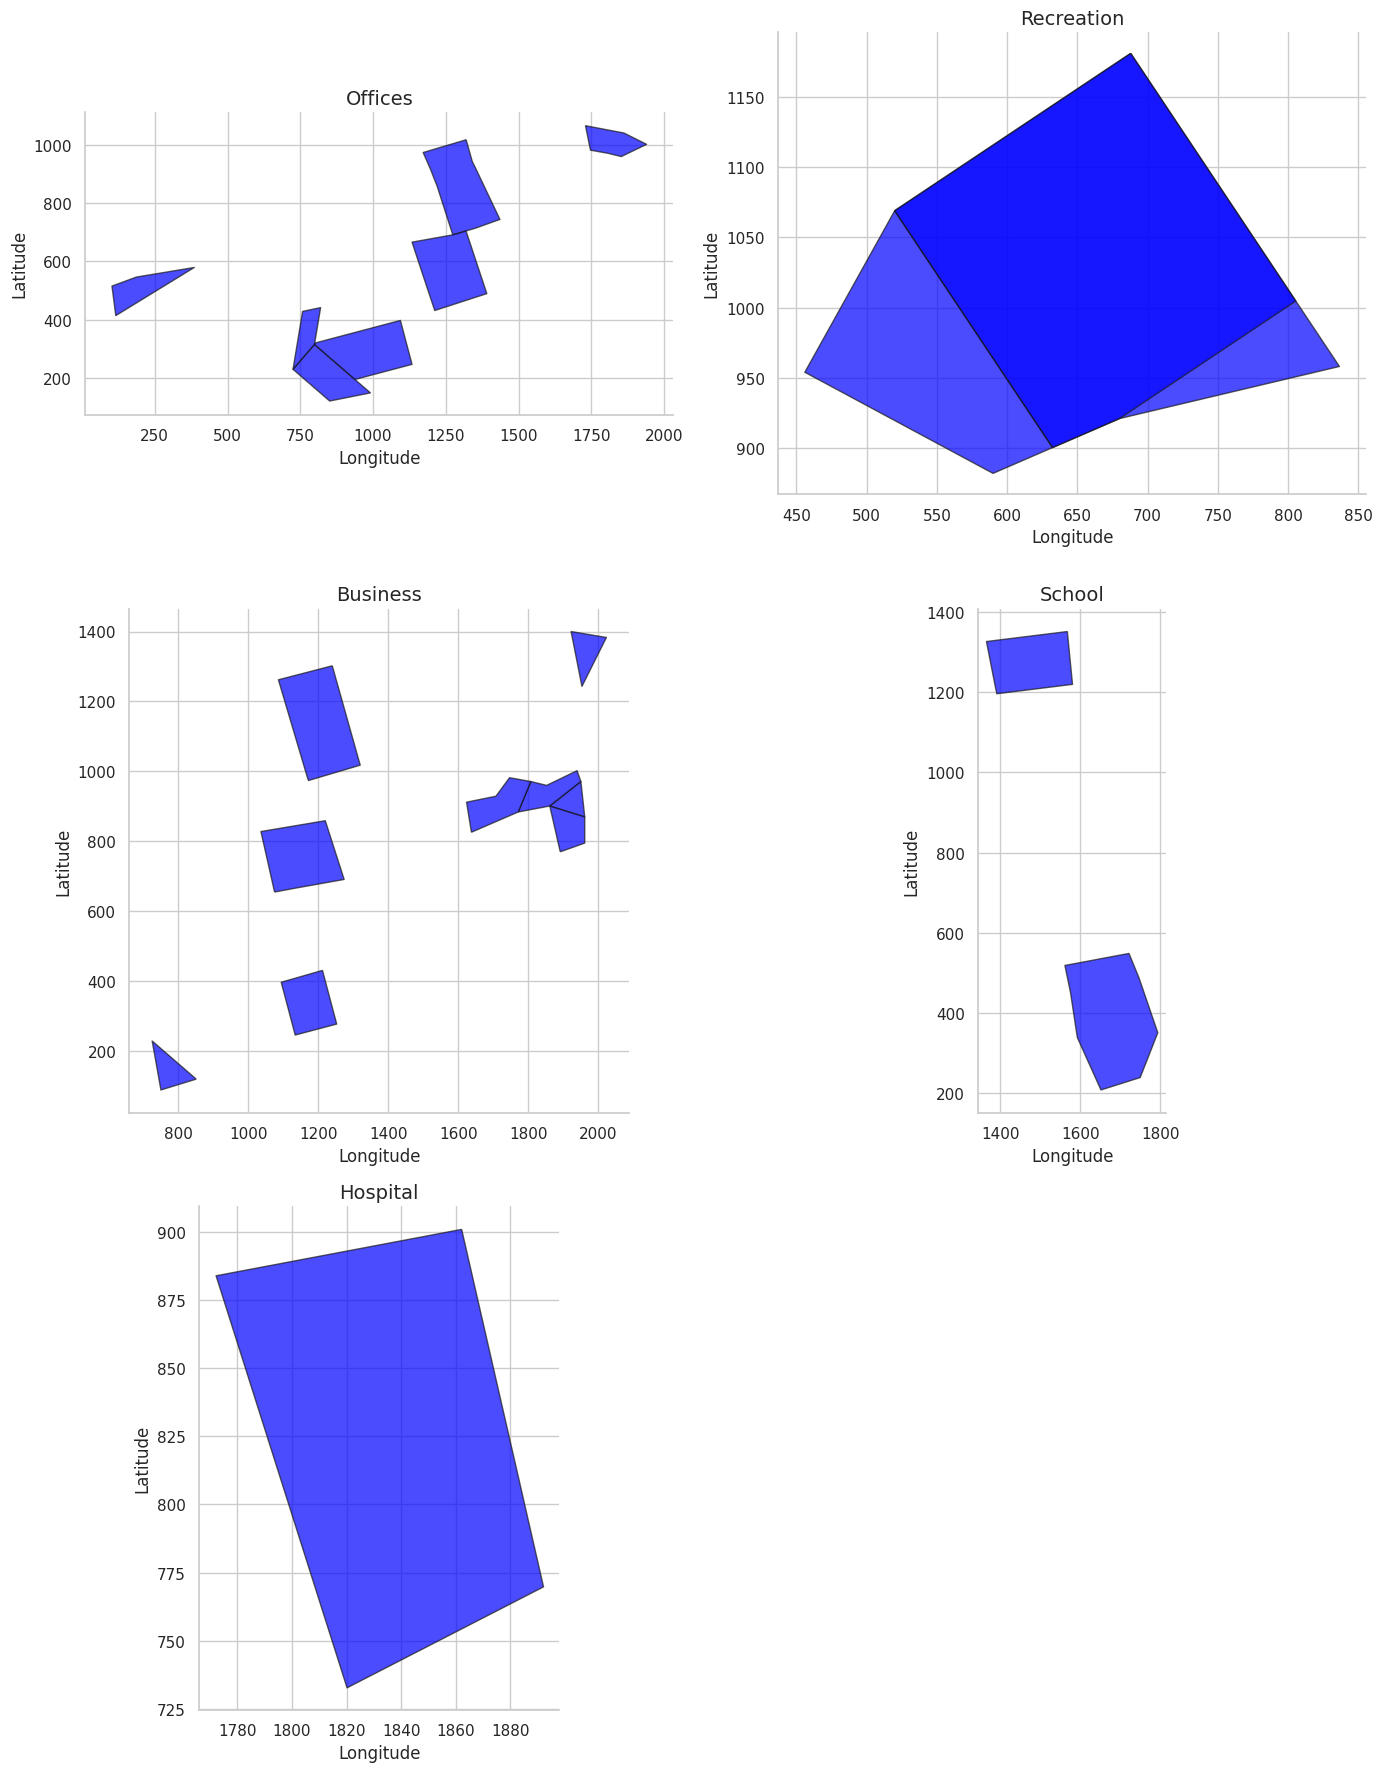

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define land type codes for filtering
land_types = {
    'Offices': 13,
    'Recreation': 12,
    'Business': 5,
    'School': 9,
    'Hospital': 10  # Assuming you want to plot one type of hospitals
}

# Calculate the number of plots needed
num_plots = len(land_types)
ncols = 2
nrows = math.ceil(num_plots / ncols)

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 6 * nrows))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate over the land types and plot each
for ax, (label, land_type) in zip(axs, land_types.items()):
    # Filter the GeoDataFrame for the specific land type
    land_gdf = gdf[gdf['type'] == land_type]

    # Plot the filtered GeoDataFrame
    land_gdf.plot(ax=ax, color='blue', alpha=0.7, edgecolor='k')

    # Set title and labels
    ax.set_title(label, fontsize=14)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    sns.despine(ax=ax)  # Remove borders for a cleaner look

# Hide any remaining empty subplots if there are fewer land types than subplots
for ax in axs[num_plots:]:
    ax.axis('off')  # Hide the empty axes

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


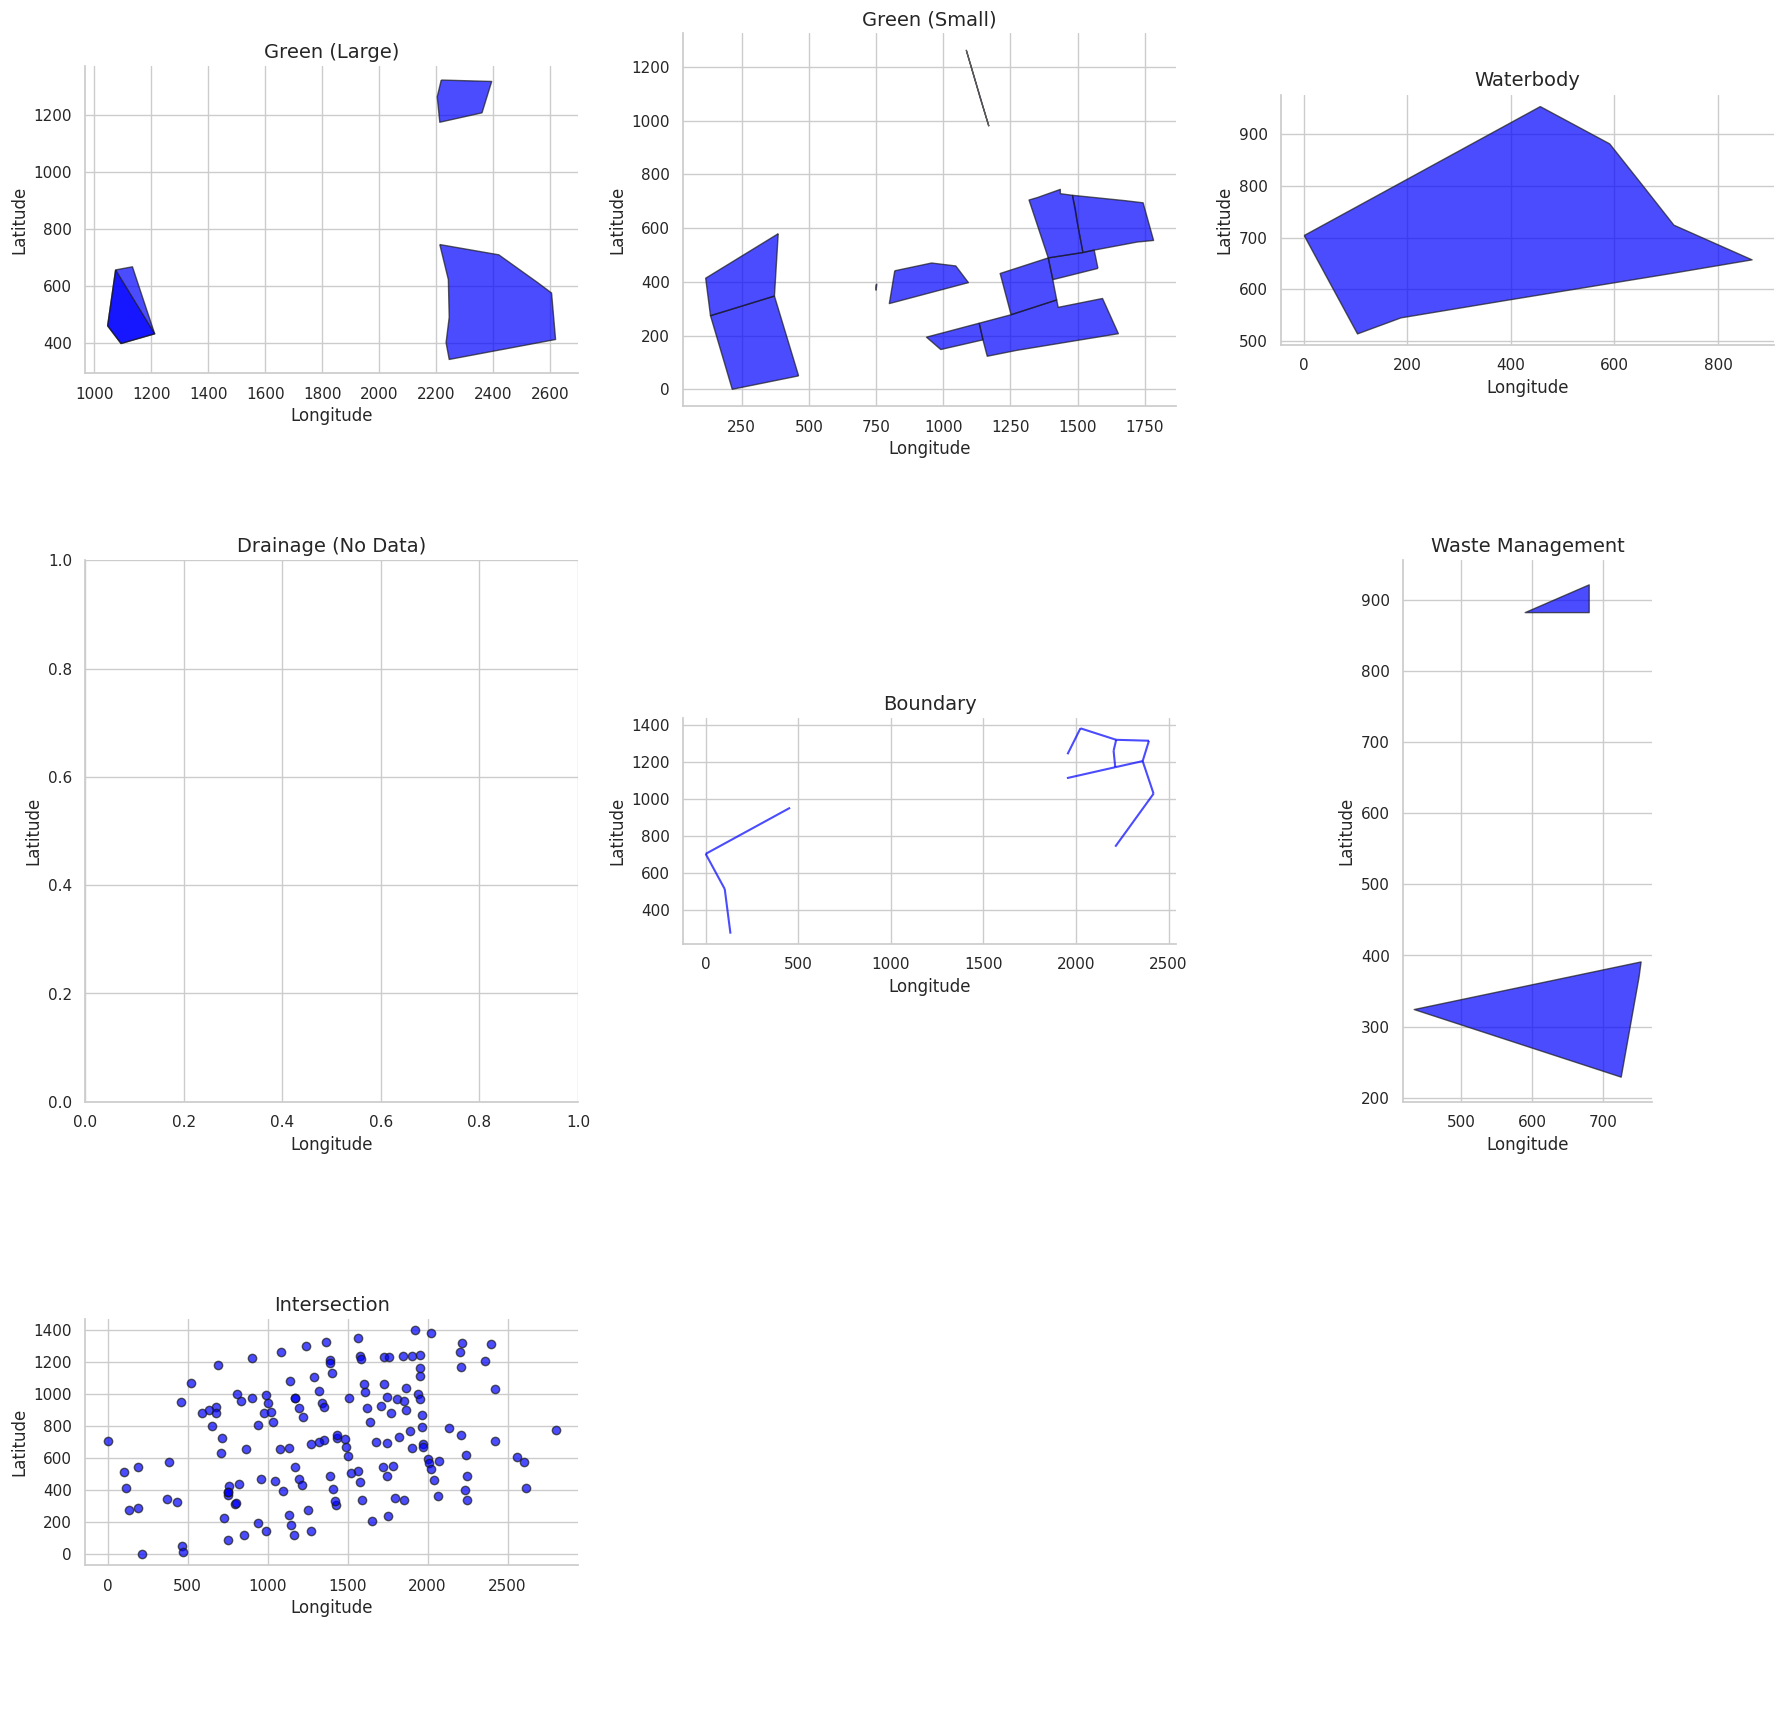

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define all land type codes for filtering
land_types = {

    'Green (Large)': 7,
    'Green (Small)': 8,
    'Waterbody': 14,
    'Drainage': 16,
    'Boundary': 3,
    'Waste Management': 6,
    'Intersection': 15,
}

# Calculate the number of plots needed
num_plots = len(land_types)
ncols = 3  # You can adjust the number of columns here
nrows = math.ceil(num_plots / ncols)

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6 * nrows))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate over the land types and plot each
for ax, (label, land_type) in zip(axs, land_types.items()):
    # Filter the GeoDataFrame for the specific land type
    land_gdf = gdf[gdf['type'] == land_type]

    # Plot the filtered GeoDataFrame if it is not empty
    if not land_gdf.empty:
        land_gdf.plot(ax=ax, color='blue', alpha=0.7, edgecolor='k')
        ax.set_title(label, fontsize=14)
    else:
        ax.set_title(f"{label} (No Data)", fontsize=14)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    sns.despine(ax=ax)  # Remove borders for a cleaner look

# Hide any remaining empty subplots if there are fewer land types than subplots
for ax in axs[num_plots:]:
    ax.axis('off')  # Hide the empty axes

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x1000 with 0 Axes>

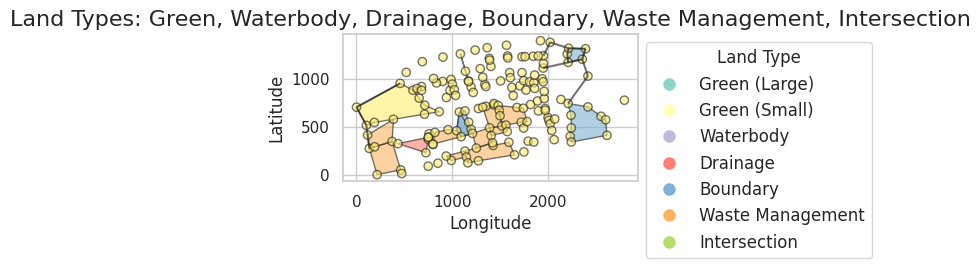

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define the specific land types you want to plot
land_types_to_plot = {
    'Green (Large)': 7,
    'Green (Small)': 8,
    'Waterbody': 14,
    'Drainage': 16,
    'Boundary': 3,
    'Waste Management': 6,
    'Intersection': 15,
}

# Filter the GeoDataFrame for the specified land types
selected_types = list(land_types_to_plot.values())
filtered_gdf = gdf[gdf['type'].isin(selected_types)]

# Create a plot
plt.figure(figsize=(12, 10))

# Plot the filtered GeoDataFrame
filtered_gdf.plot(column='type', cmap='Set3', alpha=0.6, edgecolor='k', legend=False)

# Create custom legend handles
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set3(i), markersize=10) 
                  for i in range(len(land_types_to_plot))]
legend_labels = list(land_types_to_plot.keys())

# Add title and labels
plt.title("Land Types: Green, Waterbody, Drainage, Boundary, Waste Management, Intersection", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add custom legend, positioning it outside the plot
plt.legend(legend_handles, legend_labels, title="Land Type", loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()
